In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from utils import *
plt.style.use('ggplot')

In [16]:
mf = np.load("./result/mf.npy")[range(50)]
policy = np.load("./result/policy.npy")[range(50)]
assert len(mf)==len(policy)
print("The total iteration is ", len(policy))

The total iteration is  50


In [17]:
logger = setup_logger("example_logger", log_file="example.log", level=logging.DEBUG)
r = [2,2]
K = len(r)
mu = np.array([[0.75,0.25],[0.8,0.2]])
pi1 = np.array([[0.5,0.5],[0.5,0.5]])
pi2 = np.array([[0.5,0.5],[0.5,0.5]])
pi = np.array([pi1,pi2])
W = np.eye(K)*0.2 + np.ones((K,K))*0.6
scale = [-0.2,0.2]
obj = GMFG_exact(W,mu,r,pi,K,scale)

In [12]:
res = []
for i in range(len(mf)-1):
    obj.mean_field = mf[i]
    obj.pi = policy[i]
    res.append(evaluate(obj))

In [18]:
res_1  = []
for i in range(len(mf)-1):
    obj.mean_field = mf[i]
    obj.pi = policy[i+1]
    res_1.append(evaluate(obj))

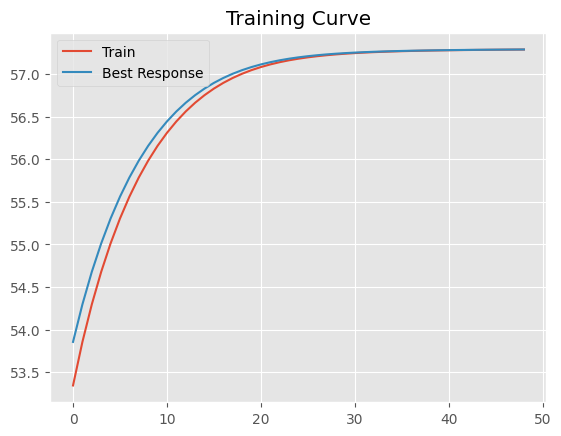

In [22]:
plt.plot(res,label='Train')
plt.plot(res_1,label='Best Response')
plt.title('Training Curve')
plt.legend(loc='best')
plt.savefig("./result/reward.png")

##### PMA step for multi-states

In [12]:
import numpy as np 
u = np.zeros((2))
np.concatenate([u,[0]])
from scipy.optimize import minimize


def softmax(x):
    temp = np.concatenate([x,[0.0]])
    temp = temp-np.max(temp)
    return np.exp(temp)/np.sum(np.exp(temp))


def func(u,eta = 0.3):
    
    def entropy(x):
        return -np.sum(x*np.log(x))

    
    pi = softmax(u)
    prev = np.array([0.3,0.3,0.4])
    q = np.array([1.5,2.5,2.0])
    return np.sum((pi-prev)**2) -2*eta*(q@pi) -entropy(pi)

initial_guess = [0,0]
bound = [(-10,10),(-10,10) ]
result = minimize(func, initial_guess,bounds=bound)
theta = result.x 
print(softmax(theta))

[0.26273753 0.3792415  0.35802097]


Time consumption

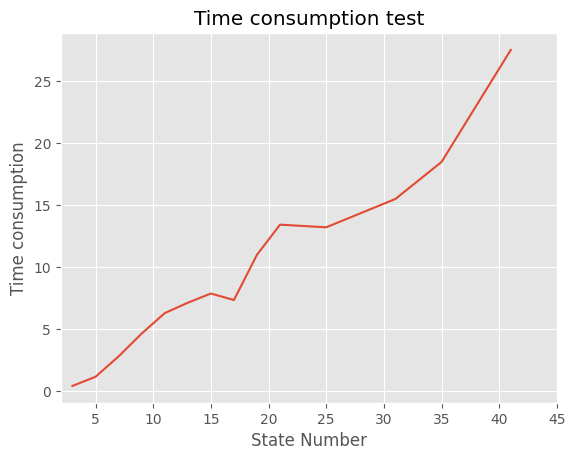

In [13]:
time_lst = [ 0.425156831741333, 1.1621825695037842,2.806723117828369,4.6480793952941895 ,6.302793264389038 ,
 7.14039945602417 ,
 7.883908033370972 ,
 7.360002279281616,
 11.015319108963013, 
 13.443971633911133,
 13.229178428649902,
 15.517223596572876,
 18.507011651992798,
 27.54809331893921
 ]
state_num = np.linspace(3,21,10)
state_num = np.append(state_num,[25,31,35,41])
plt.plot(state_num,time_lst)
plt.xlim(2,45)
plt.xlabel("State Number")
plt.ylabel("Time consumption")
plt.title("Time consumption test")
plt.savefig("./result/ring/ring_time_consumption.png")

array([ 3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 25., 31., 35.,
       41.])